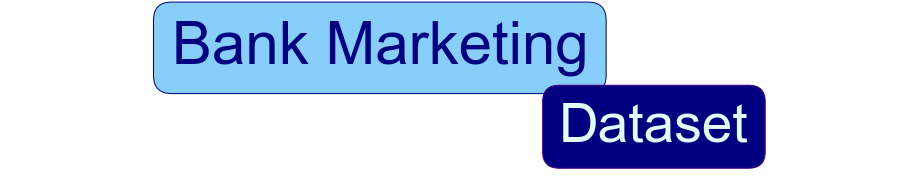

In [1]:
import pandas as pd
import numpy as np
import calendar

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize= (16,3))
_ = ax.text(0.4, .8, "Bank Marketing", color = 'Navy', size=60, rotation=0.,ha="center", va="center",
            bbox=dict(boxstyle="round", ec='Navy',fc='LightSkyBlue'))

_ = ax.text(.9, .4, "Dataset", size=55, color = 'LightCyan', rotation=0.,ha="right", va="top",
            bbox=dict(boxstyle="round",ec='Indigo',fc='Navy'))
_ = ax.axis('tight')
_ = ax.axis('off')

<div class="alert alert-block alert-info">
<font size="+2"><b>
Bank Marketing Dataset    
</b></font>
</div>

In this article, we work on a dataset available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

This dataset is based on "Bank Marketing" UCI dataset (please check the description at [archive.ics.uci.edu/ml/datasets/Bank+Marketing](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)). The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at:  [bportugal.pt/estatisticasweb](https://www.bportugal.pt/estatisticasweb). This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 


## Dataset Information:
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with fewer inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with fewer inputs).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Loading the Dataset

The zip file includes two datasets: 
1. bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
2. bank-additional.csv with 10% of the examples (4119), randomly selected from **bank-additional-full.csv**.
The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

In [2]:
Data = pd.read_csv('Data/bank-additional-full.csv', sep=';')
Data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


| Number of Instances | Number of Attributes |
|---------------------|----------------------|
| 41188               | 21                   |


### Bank Client Data

| Feature   | Description                                                                                                                                                                  |
|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age       | numeric                                                                                                                                                                      |
| Job       | Type of Job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| Marital   | marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)                                                            |
| Education | (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")                                               |
| Default   | has credit in default? (categorical: "no","yes","unknown")                                                                                                                   |
| Housing   | has housing loan? (categorical: "no","yes","unknown")                                                                                                                        |
| Loan      | has personal loan? (categorical: "no","yes","unknown")                                                                                                                       |

In [3]:
Dataset_Subcategories = {}
Dataset_Subcategories['Bank Client Data'] = [x.title() for x in Data.iloc[:,:7].columns]

### Related with the Last Contact of the Current Campaign

| Feature     | Description                                                                                                                                                                                                                                                                                                                                                                                                         |
|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Contact     | contact communication type (categorical: "cellular","telephone")                                                                                                                                                                                                                                                                                                                                                    |
| Month       | last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")                                                                                                                                                                                                                                                                                                                                    |
| Day of week | last contact day of the week (categorical: "mon","tue","wed","thu","fri")                                                                                                                                                                                                                                                                                                                                           |
| Duration    | last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |

In [4]:
Dataset_Subcategories['Related with the Last Contact of the Current Campaign'] = \
                                                [x.title().replace('_',' ') for x in Data.iloc[:,7:11].columns]

### Other Attributes

| Feature  | Description                                                                                                                                         |
|----------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| Campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                              |
| Pdays    | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| Previous | number of contacts performed before this campaign and for this client (numeric)                                                                     |
| Poutcome | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")                                                         |


In [5]:
Dataset_Subcategories['Other Attributes'] = [x.title() for x in Data.iloc[:,11:15].columns]

### Social and Economic Context Attributes

| Feature        | Description                                               |
|----------------|-----------------------------------------------------------|
| emp.var.rate   | employment variation rate - quarterly indicator (numeric) |
| cons.price.idx | consumer price index - monthly indicator (numeric)        |
| cons.conf.idx  | consumer confidence index - monthly indicator (numeric)   |
| euribor3m      | euribor* 3 month rate - daily indicator (numeric)          |
| nr.employed    | number of employees - quarterly indicator (numeric)       |

```* the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.```

In [6]:
Dataset_Subcategories['Social and Economic Context Attributes'] = ['Employment Variation Rate','Consumer Price Index',
                                               'Consumer Confidence Index','Euribor three Month Rate', 'Number of Employees']

### Output variable (Desired Target):

| Feature | Description                                                    |
|---------|----------------------------------------------------------------|
| y       | has the client subscribed a term deposit? (binary: "yes","no") |

In [7]:
Dataset_Subcategories['Output variable (Desired Target)'] = ['Term Deposit Subscription']

### Columns

In [8]:
Columns = []
for x in Dataset_Subcategories.keys():
    Columns.extend(Dataset_Subcategories[x])
    
Data.columns = Columns

Data.head()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day Of Week,...,Campaign,Pdays,Previous,Poutcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor three Month Rate,Number of Employees,Term Deposit Subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Preprocessing

In [9]:
def Data_info(Inp, Only_NaN = False):
    Out = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = Out.join(Inp.isnull().sum().to_frame(name = 'Number of NaN Values'), how='outer')
    Out ['Size'] = Inp.shape[0]
    Out['Percentage'] = np.round(100*(Out['Number of NaN Values']/Inp.shape[0]),2)
    if Only_NaN:
        Out = Out.loc[Out['Number of NaN Values']>0]
    return Out

display(Data_info(Data))

,Data Type,Number of NaN Values,Size,Percentage
Age,int64,0,41188,0.0
Campaign,int64,0,41188,0.0
Consumer Confidence Index,float64,0,41188,0.0
Consumer Price Index,float64,0,41188,0.0
Contact,object,0,41188,0.0
Day Of Week,object,0,41188,0.0
Default,object,0,41188,0.0
Duration,int64,0,41188,0.0
Education,object,0,41188,0.0
Employment Variation Rate,float64,0,41188,0.0


In [10]:
### Job
Data['Job'] = Data['Job'].apply(lambda x: x.title())

### Marital
Data['Marital'] = Data['Marital'].apply(lambda x: x.title())

### Education
Data['Education'] = Data['Education'].apply(lambda x: x.title())

### Default
Data['Default'] = Data['Default'].apply(lambda x: x.title())

### Housing
Data['Housing'] = Data['Housing'].apply(lambda x: x.title())

### Loan
Data['Loan'] = Data['Loan'].apply(lambda x: x.title())

### Contact
Data['Contact'] = Data['Contact'].apply(lambda x: x.title())

### Month
def Month_fun(M):
    Months = [x for x in calendar.month_name][1:]
    for m in Months:
        if M.lower() == m.lower()[:3]:
            return m
        
Data['Month'] = Data['Month'].apply(lambda x: Month_fun(x))
del Month_fun

### Day Of Week
def Day_fun(D):
    Days = [day for day in calendar.day_name]
    for d in Days:
        if D.lower() == d.lower()[:3]:
            return d
        
Data['Day Of Week'] = Data['Day Of Week'].apply(lambda x: Day_fun(x))
del Day_fun

### Outcome of the previous marketing campaign
Data['Poutcome'] = Data['Poutcome'].apply(lambda x: x.title())

### Output variable (has the client subscribed a term deposit?)
Data['Term Deposit Subscription'] = Data['Term Deposit Subscription'].apply(lambda x: x.title())

Therefore,

In [11]:
display(Data.head().style.hide_index())

Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day Of Week,Duration,Campaign,Pdays,Previous,Poutcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor three Month Rate,Number of Employees,Term Deposit Subscription
56,Housemaid,Married,Basic.4Y,No,No,No,Telephone,May,Monday,261,1,999,0,Nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,No
57,Services,Married,High.School,Unknown,No,No,Telephone,May,Monday,149,1,999,0,Nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,No
37,Services,Married,High.School,No,Yes,No,Telephone,May,Monday,226,1,999,0,Nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,No
40,Admin.,Married,Basic.6Y,No,No,No,Telephone,May,Monday,151,1,999,0,Nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,No
56,Services,Married,High.School,No,No,Yes,Telephone,May,Monday,307,1,999,0,Nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,No


## Saving to a CSV file

In [12]:
Data.to_csv (r'Data\Bank_mod.csv', index = None, header=True)

***
# Refrences

* S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]

***